In [1]:
import csv
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [23]:
from scipy.optimize import least_squares
from scipy.stats import expon
from scipy.stats import weibull_min as weibull

# cdf(x, c, loc=0, scale=1)
week_range = np.arange(0,1092,7)

def expo_cdf(x, max_dur=week_range.size, start=1):
    return 1- 1/np.exp(x*np.arange(start,max_dur))

def ssr_cdf(x,other_cdf,start):
    return other_cdf-expo_cdf(x,max_dur=other_cdf.size+start,start=start)

# adj_exp = least_squares(ssr_cdf,0.12,args=(cdf_T_ger['fraction'],1))

## STU Expansion

In [2]:
# Opening data
with open("results/STU96.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days_stu = []
spell_stu = []
dtin_stu = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days_stu.append(float(row[0]))
        spell_stu.append(float(row[1]))
        dtin_stu.append(int(row[2]))
        
first_spell_stu = []
second_spell_stu = []
for idx in range(len(days_stu)):
    if spell_stu[idx]==1:
        first_spell_stu.append(days_stu[idx])
    elif spell_stu[idx]==2:
        second_spell_stu.append(days_stu[idx])

## Non-Employment

In [3]:
# Opening data
with open("results/NE96.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days_ne = []
spell_ne = []
dtin_ne = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days_ne.append(float(row[0]))
        spell_ne.append(float(row[1]))
        dtin_ne.append(int(row[2]))
        
first_spell_ne = []
second_spell_ne = []
for idx in range(len(days_ne)):
    if spell_ne[idx]==1:
        first_spell_ne.append(days_ne[idx])
    elif spell_ne[idx]==2:
        second_spell_ne.append(days_ne[idx])

## Spell Adjustment

In [4]:
# Opening data
with open("results/Upper96.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days_SAdj = []
spell_SAdj = []
dtin_SAdj = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days_SAdj.append(float(row[0]))
        spell_SAdj.append(float(row[1]))
        dtin_SAdj.append(int(row[2]))
        
first_spell_SAdj = []
second_spell_SAdj = []
for idx in range(len(days_SAdj)):
    if spell_SAdj[idx]==1:
        first_spell_SAdj.append(days_SAdj[idx])
    elif spell_SAdj[idx]==2:
        second_spell_SAdj.append(days_SAdj[idx])

In [53]:
# Opening data
with open("results/Upper_only1.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days_SAdj = []
spell_SAdj = []
dtin_SAdj = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days_SAdj.append(float(row[0]))
        spell_SAdj.append(float(row[1]))
        dtin_SAdj.append(int(row[2]))
        
first_spell_SAdj1 = []
for idx in range(len(days_SAdj)):
    if spell_SAdj[idx]==1:
        first_spell_SAdj1.append(days_SAdj[idx])    

## LTU Expansion

In [5]:
# Opening data
with open("results/Lower96.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days2 = []
spell2 = []
dtin2 = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days2.append(float(row[0]))
        spell2.append(float(row[1]))
        dtin2.append(int(row[2]))

first_spell2 = []
second_spell2 = []
for idx in range(len(days2)):
    if spell2[idx]==1:
        first_spell2.append(days2[idx])
    elif spell2[idx]==2:
        second_spell2.append(days2[idx])

## Raw data

In [6]:
# Opening data
with open("results/LLower96.csv", 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

    # Passing data to lists, then to arrays (should change this to make it all in one) 
days3 = []
spell3 = []
for row in data[1:]:
    if row[0]== '' or row[1] == '':
        pass
    else:
        days3.append(float(row[0]))
        spell3.append(float(row[1]))

In [7]:
first_spell3 = []
second_spell3 = []
for idx in range(len(days3)):
    if spell3[idx]==1:
        first_spell3.append(days3[idx])
    elif spell3[idx]==2:
        second_spell3.append(days3[idx])

# Plots

In [54]:
sns.set_style("whitegrid")

# LTU
data_21, bins21 = np.histogram(first_spell2,week_range)
data_22, bins22 = np.histogram(second_spell2,week_range)

# Raw
data_31, bins31 = np.histogram(first_spell3,week_range)
data_32, bins32 = np.histogram(second_spell3,week_range)

# STU
data_stu, bins_stu = np.histogram(first_spell_SAdj,week_range)
data_stu2, bins_stu2 = np.histogram(second_spell_SAdj,week_range)

# STU - 1 only
data_stu1, bins_stu1 = np.histogram(first_spell_SAdj1,week_range)


# NE
data_ne, bins_ne = np.histogram(first_spell_ne,week_range)


data_21 = data_21 / float(sum(data_21))
data_31 = data_31 / float(sum(data_31))
data_stu = data_stu / float(sum(data_stu))
data_stu1 = data_stu1 / float(sum(data_stu1))
data_ne = data_ne / float(sum(data_ne))

data_22 = data_22 / float(sum(data_22))
data_32 = data_32 / float(sum(data_32))
data_stu2 = data_stu2 / float(sum(data_stu2))

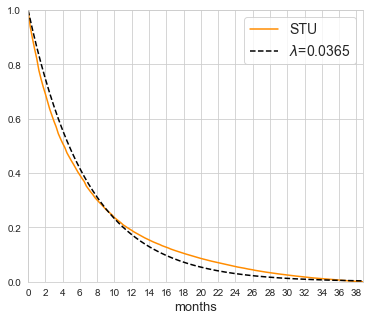

In [43]:
T = 12*10

plt.figure(figsize=(6,5))

# plt.title('Decreasing hazard rate (duration dependence)',fontsize=14)

# h_data, bins = np.histogram(data_stu, bins=np.arange(0,T,1))
h_data= data_stu/np.sum(data_stu)

# hc_data, bins = np.histogram(sample_constant, bins=np.arange(0,T,1))
# hc_data= hc_data/np.sum(hc_data)

adj_exp = least_squares(ssr_cdf,0.04,args=(np.cumsum(h_data),1))

plt.plot(bins_stu, np.hstack((1,1-np.cumsum(h_data))), c='darkorange',
         label = r"STU") # $\lambda$ = {:,.2f}, $k$ = {:,.2f}".format(1/med_lbda,k)
plt.plot(week_range,np.hstack((1,1-expo_cdf(adj_exp.x[0],max_dur=week_range.size))),ls='--',c='k',alpha=1,
         label = r"$\lambda$={:,.4f}".format(adj_exp.x[0]))


plt.legend(fontsize=14)
plt.xlabel('months',fontsize=13)
plt.xticks(week_range[::8],(week_range[::8]/28).astype(int))
plt.xlim(0,1085)
plt.ylim(0,1)

# plt.savefig('./plots/simulation1.eps',format='eps')
plt.show()

# print(r"Weibull$\lambda$ = {:,.2f}, $k$ = {:,.3f}".format(1/med_lbda,k))
# print(r"Exponential $\lambda$ = {:,.3f}".format(1/implied_lambda))

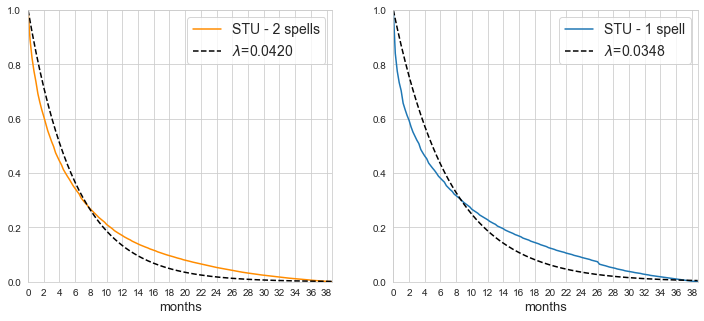

In [55]:
T = 12*10

plt.figure(figsize=(12,5))

# plt.title('Decreasing hazard rate (duration dependence)',fontsize=14)
plt.subplot(121)

h_data= data_stu/np.sum(data_stu)

adj_exp = least_squares(ssr_cdf,0.04,args=(np.cumsum(h_data),1))

plt.plot(bins_stu, np.hstack((1,1-np.cumsum(h_data))), c='darkorange',
         label = r"STU - 2 spells") # $\lambda$ = {:,.2f}, $k$ = {:,.2f}".format(1/med_lbda,k)
plt.plot(week_range,np.hstack((1,1-expo_cdf(adj_exp.x[0],max_dur=week_range.size))),ls='--',c='k',alpha=1,
         label = r"$\lambda$={:,.4f}".format(adj_exp.x[0]))


plt.legend(fontsize=14)
plt.xlabel('months',fontsize=13)
plt.xticks(week_range[::8],(week_range[::8]/28).astype(int))
plt.xlim(0,1085)
plt.ylim(0,1)

# ------------------------------------------------------------------------------
plt.subplot(122)

h_data1= data_stu1/np.sum(data_stu1)

adj_exp1 = least_squares(ssr_cdf,0.04,args=(np.cumsum(h_data1),1))

plt.plot(bins_stu1, np.hstack((1,1-np.cumsum(h_data1))),
         label = r"STU - 1 spell") # $\lambda$ = {:,.2f}, $k$ = {:,.2f}".format(1/med_lbda,k)
plt.plot(week_range,np.hstack((1,1-expo_cdf(adj_exp1.x[0],max_dur=week_range.size))),ls='--',c='k',alpha=1,
         label = r"$\lambda$={:,.4f}".format(adj_exp1.x[0]))


plt.legend(fontsize=14)
plt.xlabel('months',fontsize=13)
plt.xticks(week_range[::8],(week_range[::8]/28).astype(int))
plt.xlim(0,1085)
plt.ylim(0,1)

# plt.savefig('./plots/simulation1.eps',format='eps')
plt.show()

# print(r"Weibull$\lambda$ = {:,.2f}, $k$ = {:,.3f}".format(1/med_lbda,k))
# print(r"Exponential $\lambda$ = {:,.3f}".format(1/implied_lambda))

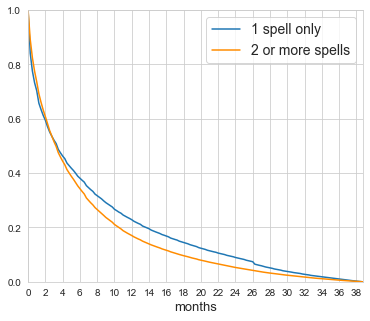

In [58]:
T = 12*10

plt.figure(figsize=(6,5))

# plt.title('Decreasing hazard rate (duration dependence)',fontsize=14)

h_data1= data_stu1/np.sum(data_stu1)

adj_exp1 = least_squares(ssr_cdf,0.04,args=(np.cumsum(h_data1),1))

plt.plot(bins_stu1, np.hstack((1,1-np.cumsum(h_data1))),
         label = r"1 spell only") # $\lambda$ = {:,.2f}, $k$ = {:,.2f}".format(1/med_lbda,k)
# plt.plot(week_range,np.hstack((1,1-expo_cdf(adj_exp1.x[0],max_dur=week_range.size))),ls='--',c='navy',alpha=1,
#          label = r"$\lambda$={:,.3f}".format(adj_exp1.x[0]))
# ------------------------------------------------------------------------------

h_data= data_stu/np.sum(data_stu)

adj_exp = least_squares(ssr_cdf,0.04,args=(np.cumsum(h_data),1))

plt.plot(bins_stu, np.hstack((1,1-np.cumsum(h_data))), c='darkorange',
         label = r"2 or more spells") # $\lambda$ = {:,.2f}, $k$ = {:,.2f}".format(1/med_lbda,k)
# plt.plot(week_range,np.hstack((1,1-expo_cdf(adj_exp.x[0],max_dur=week_range.size))),ls='--', c='darkorange',alpha=1,
#          label = r"$\lambda$={:,.3f}".format(adj_exp.x[0]))

plt.legend(fontsize=14)
plt.xlabel('months',fontsize=13)
plt.xticks(week_range[::8],(week_range[::8]/28).astype(int))
plt.xlim(0,1085)
plt.ylim(0,1)

# plt.savefig('./plots/simulation1.eps',format='eps')
plt.show()

# print(r"Weibull$\lambda$ = {:,.2f}, $k$ = {:,.3f}".format(1/med_lbda,k))
# print(r"Exponential $\lambda$ = {:,.3f}".format(1/implied_lambda))

# First and Second Spells

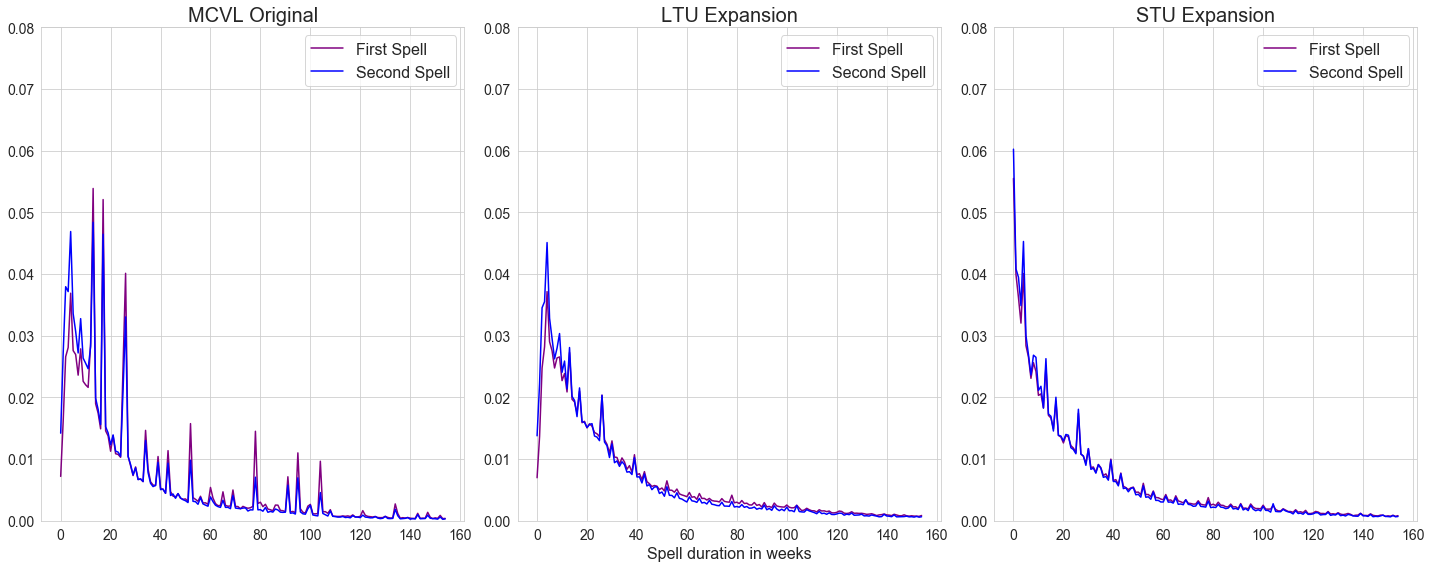

In [19]:
plt.figure(figsize=(20,8))
#plt.suptitle('Hazard rate by Spell Number', fontsize=22)
plt.subplot(131)
plt.plot(data_31, c= 'purple', label='First Spell')
plt.plot(data_32, c='b', label='Second Spell')
plt.legend(loc='best', fontsize=16)
plt.title('MCVL Original', fontsize=20)
plt.ylim(0,0.08)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(132)
plt.plot(data_21, c='purple', label='First Spell')
plt.plot(data_22, c='b', label='Second Spell')
plt.legend(loc='best', fontsize=16)
plt.title('LTU Expansion', fontsize=20)
plt.ylim(0,0.08)
plt.xlabel('Spell duration in weeks',fontsize=16 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(133)
plt.plot(data_stu, c='purple', label='First Spell')
plt.plot(data_stu2, c='b', label='Second Spell')
plt.legend(loc='best', fontsize=16)
plt.title('STU Expansion', fontsize=20)
plt.ylim(0,0.08)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig("plots/n_spell.png", format='png', box_inches='tight')

plt.show()